In [1]:
import pandas as pd
from datetime import datetime, timezone,timedelta,date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from itertools import islice
import json
from web3 import Web3
import matplotlib.ticker as mtick
path = ""
path_output=""

In [2]:
li_1inch_address=['0xe4c577bdec9ce0f6c54f2f82aed5b1913b71ae2f', 
            '0x0000000006adbd7c01bc0738cdbfc3932600ad63', 
            '0x0000000053d411becdb4a82d8603edc6d8b8b3bc',
            '0x000005edbbc1f258302add96b5e20d3442e5dd89', 
            '0x0000000f8ef4be2b7aed6724e893c1b674b9682d',
            '0x111112549cfedf7822eb11fbd8fd485d8a10f93f',
            '0x111111254b08ceeee8ad6ca827de9952d2a46781', 
            '0x11111254369792b2ca5d084ab5eea397ca8fa48b', 
            '0x111111125434b319222cdbf8c261674adb56f3ae', 
            '0x11111112542d85b3ef69ae05771c2dccff4faa26', 
            '0x1111111254fb6c44bac0bed2854e76f90643097d', 
            '0x1111111254eeb25477b68fb85ed929f73a960582']

In [3]:
matcha_address=['0xdef1c0ded9bec7f1a1670819833240f027b25eff',
               '0x61935cbdd02287b511119ddb11aeb42f1593b7ef']

In [4]:
cowswap_address='0x9008d19f58aabd9ed0d60971565aa8510560ab41'

In [20]:
#sandwich data for the three aggregators
# data origin from EigenPhi
df_cow_sandwich=pd.read_csv(path_output+'cowswap_victim_txs.csv')
df_1inch_sandwich=pd.read_csv(path_output+'1inch_victim_txs.csv')
df_matcha_sandwich=pd.read_csv(path_output+'matcha_victim_txs.csv')

df_cow_sandwich_tx=pd.read_csv(path_output+'cowswap_victim_txlist.csv')
df_1inch_sandwich_tx=pd.read_csv(path_output+'1inch_victim_txlist.csv')
df_matcha_sandwich_tx=pd.read_csv(path_output+'matcha_victim_txlist.csv')

In [50]:
#datetime format
df_matcha_sandwich['datetime']=df_matcha_sandwich['blockTimestamp'].apply(lambda x: 
                                                                        datetime.fromtimestamp(x,tz=timezone.utc))
df_matcha_sandwich['datetime'] = pd.to_datetime(df_matcha_sandwich['datetime']).dt.tz_localize(None)

df_1inch_sandwich['datetime']=df_1inch_sandwich['blockTimestamp'].apply(lambda x: 
                                                                        datetime.fromtimestamp(x,tz=timezone.utc))
df_1inch_sandwich['datetime'] = pd.to_datetime(df_1inch_sandwich['datetime']).dt.tz_localize(None)

df_cow_sandwich['datetime']=df_cow_sandwich['blockTimestamp'].apply(lambda x: 
                                                                        datetime.fromtimestamp(x,tz=timezone.utc))
df_cow_sandwich['datetime'] = pd.to_datetime(df_cow_sandwich['datetime']).dt.tz_localize(None)

Text(0, 0.5, 'Counts')

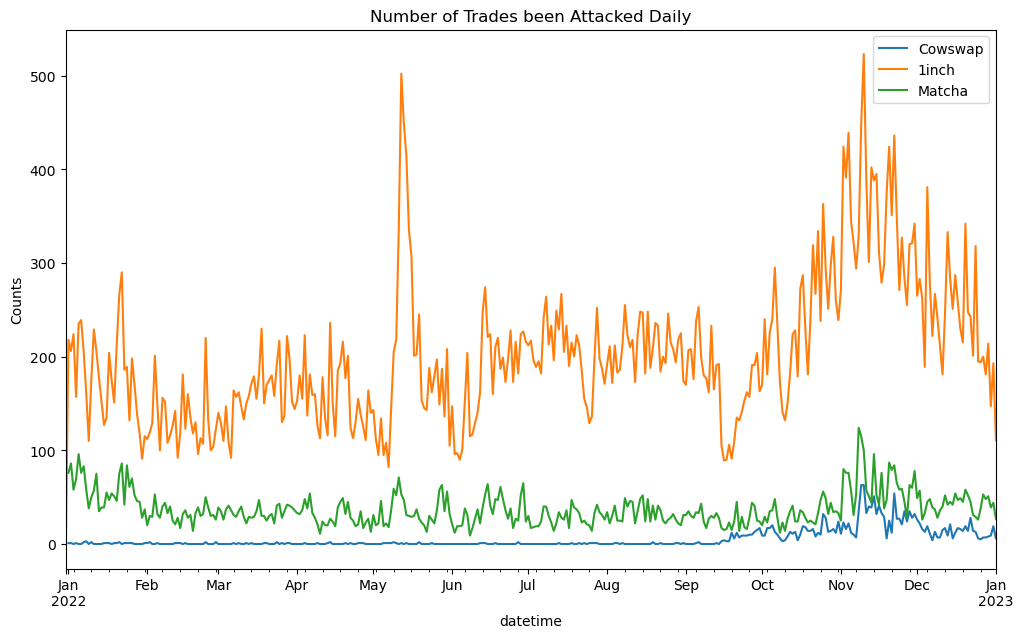

In [10]:
fig, ax1 = plt.subplots(figsize=(12,7))
df_cow_sandwich.groupby('datetime').count()['attackerTxs'].resample('D').sum().plot()

df_1inch_sandwich.groupby('datetime').count()['attackerTxs'].resample('D').sum().plot()

df_matcha_sandwich.groupby('datetime').count()['attackerTxs'].resample('D').sum().plot()
ax1.legend(['Cowswap','1inch','Matcha'])
ax1.set_title('Number of Trades been Attacked Daily')
ax1.set_ylabel('Counts')

In [11]:
monthly_revenue_plot=pd.concat([df_1inch_sandwich.groupby('datetime').sum()['revenue'].resample('M').sum().rename('1inch')
    ,df_matcha_sandwich.groupby('datetime').sum()['revenue'].resample('M').sum().rename('Matcha'),
df_cow_sandwich.groupby('datetime').sum()['revenue'].resample('M').sum().rename('Cowswap')],
          axis=1)

In [12]:
df_1inch_sandwich['revenue'].sum()

25810847.957441207

In [13]:
df_matcha_sandwich['revenue'].sum()

6402871.119589517

In [14]:
df_cow_sandwich['revenue'].sum()

131979.51668709444

In [15]:
daily_revenue_plot=pd.concat([df_1inch_sandwich.groupby('datetime').sum()['revenue'].resample('D').sum().rename('1inch'),
df_matcha_sandwich.groupby('datetime').sum()['revenue'].resample('D').sum().rename('Matcha'),
 df_cow_sandwich.groupby('datetime').sum()['revenue'].resample('D').sum().rename('Cowswap')],axis=1)

In [16]:
monthly_revenue_plot.index=monthly_revenue_plot.index.strftime('%b')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


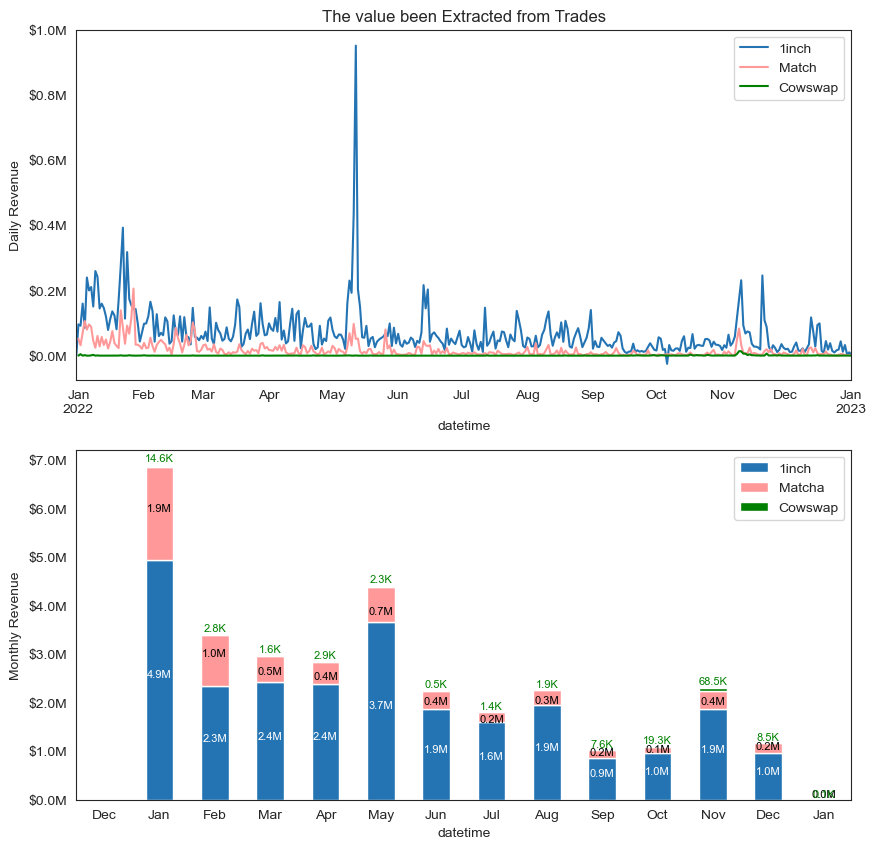

In [17]:
sns.set_style('white')
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)
fig, axes = plt.subplots(2,1,figsize=(10,10))

daily_revenue_plot.plot(ax=axes[0],color=['#2474b4','#ff9999','green'])
axes[0].legend(['1inch','Match','Cowswap'])
axes[0].set_title('The value been Extracted from Trades')
axes[0].set_ylabel('Daily Revenue')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(millions))
monthly_revenue_plot.plot.bar(ax=axes[1],color=['#2474b4','#ff9999','green'],stacked=True)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(millions))
axes[1].set_ylabel('Monthly Revenue')
plt.xticks(rotation=0)
for i, v in enumerate(monthly_revenue_plot['1inch']):
    axes[1].text(i,monthly_revenue_plot['1inch'][i]*0.5,str('%1.1fM' % (monthly_revenue_plot['1inch'][i] * 1e-6)), 
                 ha='center', va='bottom',color='white',size=8)
for i, v in enumerate(monthly_revenue_plot['Matcha']):
    axes[1].text(i,(monthly_revenue_plot['1inch'][i]+monthly_revenue_plot['Matcha'][i])*0.86,str('%1.1fM' % (monthly_revenue_plot['Matcha'][i] * 1e-6)), 
                 ha='center', va='bottom',color='black',size=8)
for i, v in enumerate(monthly_revenue_plot['Cowswap']):
    axes[1].text(i,(monthly_revenue_plot['1inch'][i]+monthly_revenue_plot['Matcha'][i]+monthly_revenue_plot['Cowswap'][i])*1.01,str('%1.1fK' % (monthly_revenue_plot['Cowswap'][i] * 1e-3)), 
                 ha='center', va='bottom',color='green',size=8)

In [29]:
count_1inch_total=2777889
count_cowswap_total=284859
count_matcha_total=712657

count_1inch_pie_plot=pd.DataFrame({'numbers': [count_1inch_total-df_1inch_sandwich_tx['tx_hash'].nunique(),df_1inch_sandwich_tx['tx_hash'].nunique()]}, 
             index=['Non-Attacked Tx Counts','Attacked Tx Counts']
            )

count_matcha_pie_plot=pd.DataFrame({'numbers': [count_matcha_total-df_matcha_sandwich_tx['tx_hash'].nunique(),df_matcha_sandwich_tx['tx_hash'].nunique()]}, 
             index=['Non-Attacked Tx Counts','Attacked Tx Counts']
            )

count_cowswap_pie_plot=pd.DataFrame({'numbers': [count_cowswap_total-df_cow_sandwich_tx['txHash'].nunique(),df_cow_sandwich_tx['txHash'].nunique()]}, 
             index=['Non-Attacked Tx Counts','Attacked Tx Counts']
            )

In [30]:
count_1inch_pie_plot

,numbers
Non-Attacked Tx Counts,2703884
Attacked Tx Counts,74005


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


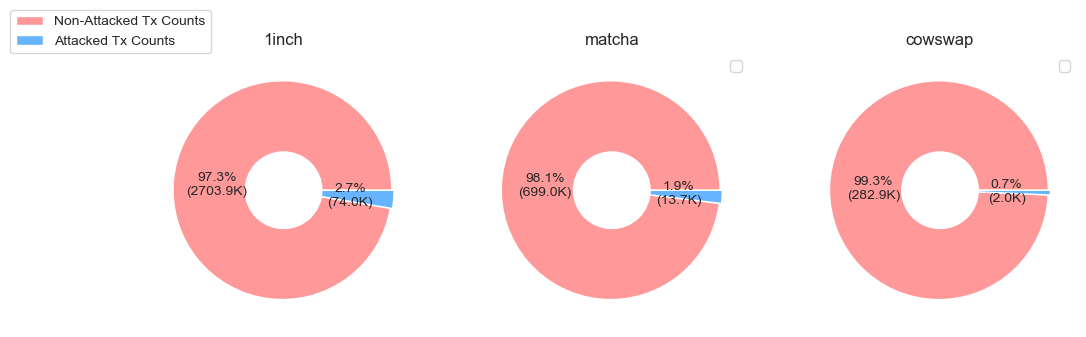

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
def func(pct, allvals):
    absolute = float(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:.1f}K)".format(pct, absolute)

explode = (0.01, 0.01)
colors = ['#ff9999', '#66b3ff']
count_1inch_pie_plot.plot.pie(ylabel='', y='numbers',labels=None,
                                    title='1inch',
                                    autopct=lambda pct: func(pct, count_1inch_pie_plot/1000),
                                    explode=explode,colors=colors,ax=axes[0])
count_matcha_pie_plot.plot.pie(ylabel='', y='numbers',labels=None,
                                    title='matcha',
                                    autopct=lambda pct: func(pct, count_matcha_pie_plot/1000),
                                    explode=explode,colors=colors,ax=axes[1])
count_cowswap_pie_plot.plot.pie(ylabel='', y='numbers',
                                    title='cowswap',labels=None,
                                    autopct=lambda pct: func(pct, count_cowswap_pie_plot/1000),
                                    explode=explode,colors=colors,ax=axes[2])
axes[0].legend(labels=['Non-Attacked Tx Counts','Attacked Tx Counts'],loc=(-0.5,1))
circle = plt.Circle((0,0), 0.35, color='white')
circle1 = plt.Circle((0,0), 0.35, color='white')
circle2 = plt.Circle((0,0), 0.35, color='white')
axes[0].add_artist(circle)
axes[1].legend(labels=None)
axes[1].add_artist(circle1)
axes[2].legend(labels=None)
axes[2].add_artist(circle2)


In [34]:
volume_1inch=pd.read_csv(path+'1inch_victim_volume.csv')
volume_cowswap=pd.read_csv(path+'cowswap_victim_volume.csv')
volume_matcha=pd.read_csv(path+'matcha_victim_volume.csv')

In [35]:
volume_1inch=volume_1inch[volume_1inch['transactionHash']!='0xdde93498743965cf0aa50936d7e2529ba647005237bea9f002a423f92e88fd62']

In [36]:
volume_1inch.rename(columns={'0':'volume'},inplace=True)

volume_cowswap.rename(columns={'0':'volume'},inplace=True)
volume_matcha.rename(columns={'0':'volume'},inplace=True)

In [37]:
volume_1inch_total=100768610040.8235
volume_cowswap_total=14622096869.25
volume_matcha_total=22294922636.886677

volume_1inch_pie_plot=pd.DataFrame({'numbers': [volume_1inch_total-volume_1inch['volume'].sum(),volume_1inch['volume'].sum()]}, 
             index=['Non-Attacked Volume','Attacked Volume']
            )

volume_matcha_pie_plot=pd.DataFrame({'numbers': [volume_matcha_total-volume_matcha['volume'].sum(),volume_matcha['volume'].sum()]}, 
             index=['Non-Attacked Volume','Attacked Volume']
            )

volume_cowswap_pie_plot=pd.DataFrame({'numbers': [volume_cowswap_total-volume_cowswap['volume'].sum(),volume_cowswap['volume'].sum()]}, 
             index=['Non-Attacked Volume','Attacked Volume']
            )

In [38]:
volume_cowswap['volume'].sum()

100095406.30044651

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


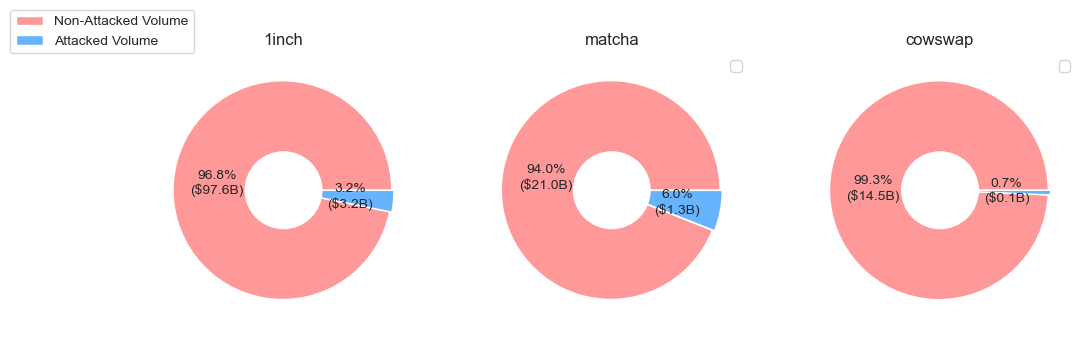

In [39]:
def func(pct, allvals):
    absolute = float(pct/100.*np.sum(allvals))
    return "{:.1f}%\n(${:.1f}B)".format(pct, absolute)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

explode = (0.01, 0.01)
colors = ['#ff9999', '#66b3ff']
volume_1inch_pie_plot.plot.pie(ylabel='', y='numbers',labels=None,
                                    title='1inch',
                                    autopct=lambda pct: func(pct, volume_1inch_pie_plot/1000000000),
                                    explode=explode,colors=colors,ax=axes[0])
volume_matcha_pie_plot.plot.pie(ylabel='', y='numbers',labels=None,
                                    title='matcha',
                                    autopct=lambda pct: func(pct, volume_matcha_pie_plot/1000000000),
                                    explode=explode,colors=colors,ax=axes[1])
volume_cowswap_pie_plot.plot.pie(ylabel='', y='numbers',
                                    title='cowswap',labels=None,
                                    autopct=lambda pct: func(pct, volume_cowswap_pie_plot/1000000000),
                                    explode=explode,colors=colors,ax=axes[2])
axes[0].legend(labels=['Non-Attacked Volume','Attacked Volume'],loc=(-0.5,1))
circle = plt.Circle((0,0), 0.35, color='white')
circle1 = plt.Circle((0,0), 0.35, color='white')
circle2 = plt.Circle((0,0), 0.35, color='white')
axes[0].add_artist(circle)
axes[1].legend(labels=None)
axes[1].add_artist(circle1)
axes[2].legend(labels=None)
axes[2].add_artist(circle2)


In [40]:
data={'Non-attacked Volume':[volume_1inch_total-volume_1inch['volume'].sum(),
                              volume_matcha_total-volume_matcha['volume'].sum(),
                               volume_cowswap_total-volume_cowswap['volume'].sum()],
    'Attacked Volume':[volume_1inch['volume'].sum(),volume_matcha['volume'].sum(),volume_cowswap['volume'].sum()]}

In [41]:
df_compare=pd.DataFrame(data,index=['1inch','matcha','cowswap'])

<AxesSubplot:>

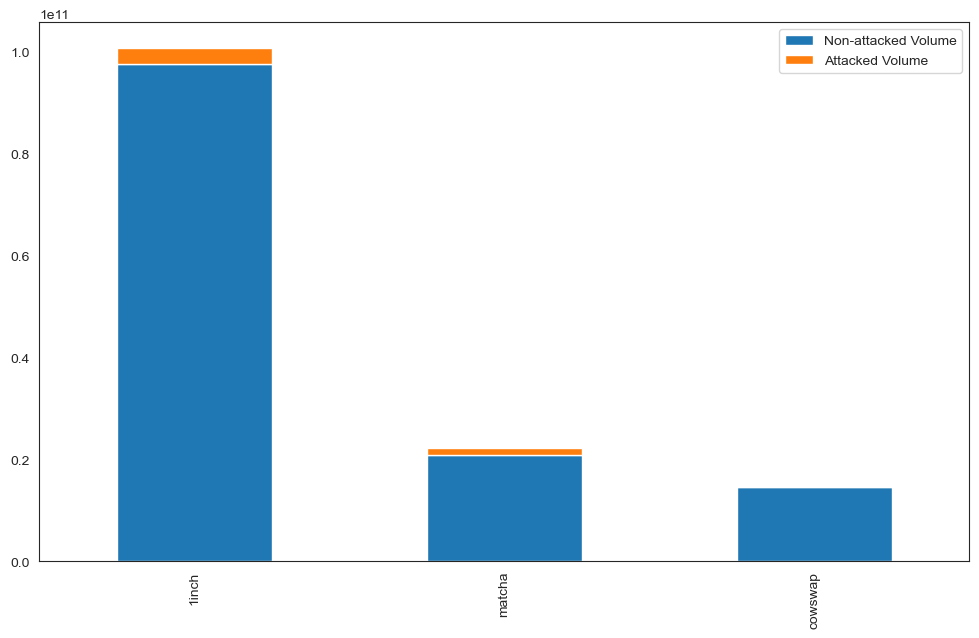

In [42]:
fig, axes =plt.subplots(figsize=(12,7))
df_compare[['Non-attacked Volume','Attacked Volume']].plot(kind='bar',stacked=True,ax=axes)


In [47]:
# Get the hash for sandwich group
def sandwichgroup_hash(df_sandwich):
    df_sandwich["MEVID01"]=(df_sandwich["victimTxs"]+df_sandwich["attackerTxs"]).str.split(' ')
    df_sandwich["MEVID02"]=df_sandwich["MEVID01"]
    for i in range(0,len(df_sandwich["MEVID01"])):  
        df_sandwich["MEVID02"][i]=Web3.keccak(text=''.join(sorted(df_sandwich["MEVID01"][i]))).hex()
    df_sandwich["transactionHash"]=df_sandwich["MEVID02"]
    return df_sandwich

df_1inch_sandwich=sandwichgroup_hash(df_1inch_sandwich)
df_matcha_sandwich=sandwichgroup_hash(df_matcha_sandwich)
df_cow_sandwich=sandwichgroup_hash(df_cow_sandwich)

In [55]:
volume_1inch_monthly=volume_1inch.merge(df_1inch_sandwich[['transactionHash','datetime']],on='transactionHash',how='left').groupby(
'datetime').sum()['volume'].resample('M').sum().rename('1inch')

volume_matcha_monthly=volume_matcha.merge(df_matcha_sandwich[['transactionHash','datetime']],on='transactionHash',how='left').groupby(
'datetime').sum()['volume'].resample('M').sum().rename('Matcha')

volume_cowswap_monthly=volume_cowswap.merge(df_cow_sandwich[['transactionHash','datetime']],on='transactionHash',how='left').groupby(
'datetime').sum()['volume'].resample('M').sum().rename('Cowswap')

volume_1inch_daily=volume_1inch.merge(df_1inch_sandwich[['transactionHash','datetime']],on='transactionHash',how='left').groupby(
'datetime').sum()['volume'].resample('D').sum().rename('1inch')

volume_matcha_daily=volume_matcha.merge(df_matcha_sandwich[['transactionHash','datetime']],on='transactionHash',how='left').groupby(
'datetime').sum()['volume'].resample('D').sum().rename('Matcha')
volume_cowswap_daily=volume_cowswap.merge(df_cow_sandwich[['transactionHash','datetime']],on='transactionHash',how='left').groupby(
'datetime').sum()['volume'].resample('D').sum().rename('Cowswap')

volume_monthly=pd.concat([volume_1inch_monthly,volume_matcha_monthly,volume_cowswap_monthly],axis=1)
volume_daily=pd.concat([volume_1inch_daily,volume_matcha_daily,volume_cowswap_daily],axis=1)

volume_monthly.index=volume_monthly.index.strftime('%b')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


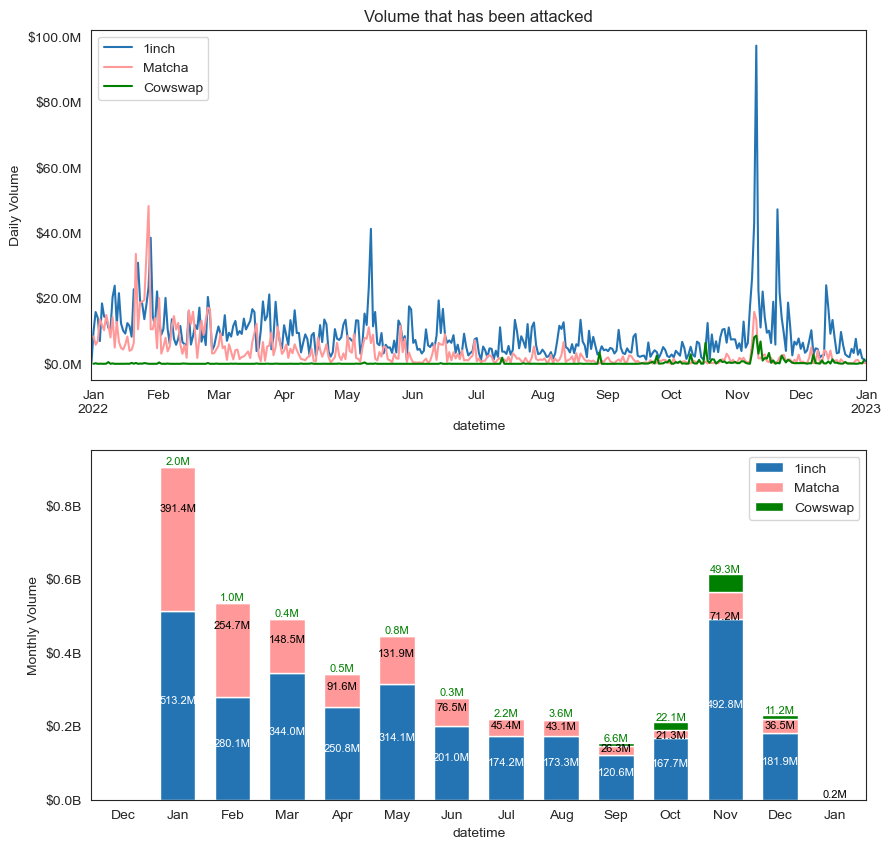

In [58]:
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)
def billions(x, pos):
    return '$%1.1fB' % (x * 1e-9)
fig, axes = plt.subplots(2,1,figsize=(10,10))

volume_daily.plot(ax=axes[0],color=['#2474b4','#ff9999','green'])
axes[0].set_title('Volume that has been attacked')
axes[0].set_ylabel('Daily Volume')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(millions))
volume_monthly.plot.bar(ax=axes[1],color=['#2474b4','#ff9999','green'],stacked=True,width=0.65)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(billions))
axes[1].set_ylabel('Monthly Volume')
plt.xticks(rotation=0)
for i, v in enumerate(volume_monthly['1inch']):
    axes[1].text(i,volume_monthly['1inch'][i]*0.5,str('%1.1fM' % (volume_monthly['1inch'][i] * 1e-6)), 
                 ha='center', va='bottom',color='white',size=8)
for i, v in enumerate(volume_monthly['Matcha']):
    axes[1].text(i,(volume_monthly['1inch'][i]+volume_monthly['Matcha'][i])*0.86,str('%1.1fM' % (volume_monthly['Matcha'][i] * 1e-6)), 
                 ha='center', va='bottom',color='black',size=8)
for i, v in enumerate(volume_monthly['Cowswap']):
    axes[1].text(i,(volume_monthly['1inch'][i]+volume_monthly['Matcha'][i]+volume_monthly['Cowswap'][i]),str('%1.1fM' % (volume_monthly['Cowswap'][i] * 1e-6)), 
                 ha='center', va='bottom',color='green',size=8)

In [59]:
df = pd.DataFrame({
    '1inch': volume_1inch['volume'],
    'Cowswap': volume_cowswap['volume'],
    'Matcha': volume_matcha['volume']
})

In [60]:
df

,1inch,Cowswap,Matcha
0,668.538102,22914.599299,56845.424820
1,6357.560053,4083.178819,32952.871196
2,98.432110,201617.668632,2471.355970
3,2917.602299,15573.867042,5736.859901
4,2748.429156,1306.026751,2100.596144
...,...,...,...
73482,7998.258879,NaN,NaN
73483,185.024360,NaN,NaN
73484,49998.585655,NaN,NaN
73485,20023.178071,NaN,NaN


In [61]:
volume_1inch[volume_1inch['volume']!=0]['volume']

0          668.538102
1         6357.560053
2           98.432110
3         2917.602299
4         2748.429156
             ...     
73482     7998.258879
73483      185.024360
73484    49998.585655
73485    20023.178071
73486    44219.308685
Name: volume, Length: 73473, dtype: float64

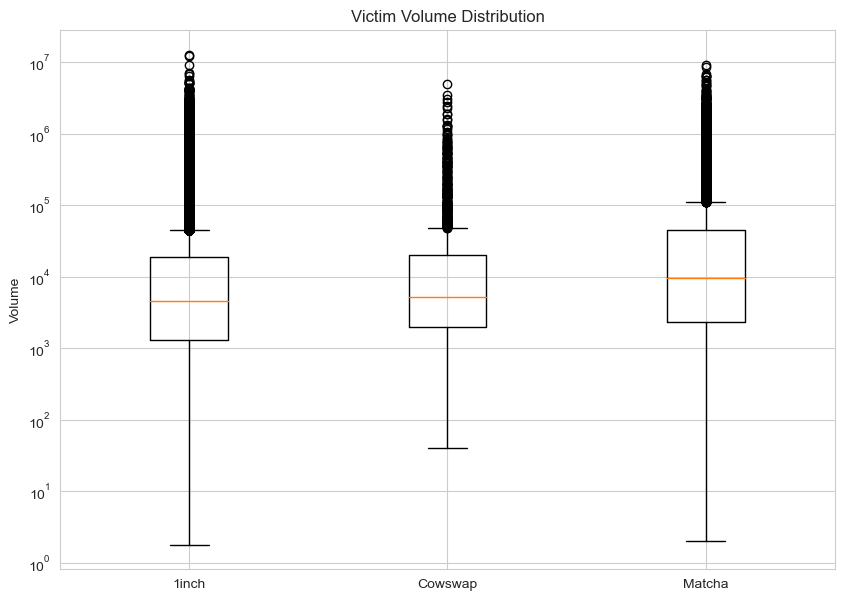

In [62]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot([volume_1inch[volume_1inch['volume']!=0]['volume'], 
            volume_cowswap[volume_cowswap['volume']!=0]['volume'], 
            volume_matcha[volume_matcha['volume']!=0]['volume']])
ax.set_xticklabels(['1inch', 'Cowswap', 'Matcha'])
# set the title and axis labels
ax.set_title('Victim Volume Distribution')
ax.set_xlabel('')
ax.set_ylabel('Volume')
ax.set_yscale('log')
# show the plot
plt.show()

In [64]:
volume_bins_custom = [0,1,10,10**2,10**3,10**4,10**5,10**6,10**7]
volume_bin_point = [(x+y)/2 for x,y in zip(volume_bins_custom[:-1],volume_bins_custom[1:])]
volume_pdf_1inch, volume_bin_edges = np.histogram(volume_1inch[volume_1inch['volume']>0]['volume'], bins=volume_bins_custom, density=True)
volume_pdf_matcha, volume_bin_edges = np.histogram(volume_matcha[volume_matcha['volume']>0]['volume'], bins=volume_bins_custom, density=True)
volume_pdf_cowswap, volume_bin_edges = np.histogram(volume_cowswap[volume_cowswap['volume']>0]['volume'], bins=volume_bins_custom, density=True)



In [65]:
volume_pdf=pd.DataFrame([volume_pdf_1inch,
              volume_pdf_matcha,
              volume_pdf_cowswap]).T.rename(columns={0:'1inch',1:'matcha',2:'cowswap'}).replace(0,np.nan)

In [66]:
volume_pdf['bin_point']=volume_bin_point
volume_pdf.set_index('bin_point',inplace=True)
volume_pdf

,1inch,matcha,cowswap
bin_point,,,
0.5,NaN,NaN,NaN
5.5,1.361081e-05,5.699258e-05,NaN
55.0,1.123648e-04,7.246200e-05,7.977208e-05
550.0,2.091831e-04,1.269306e-04,1.321937e-04
5500.0,5.105113e-05,4.375402e-05,5.612536e-05
55000.0,2.931315e-06,3.803848e-06,3.207977e-06
550000.0,7.944178e-08,1.331184e-07,7.977208e-08
5500000.0,7.470824e-10,2.532099e-09,9.116809e-10


Text(0.5, 1.0, 'PDF of the Victim Volume')

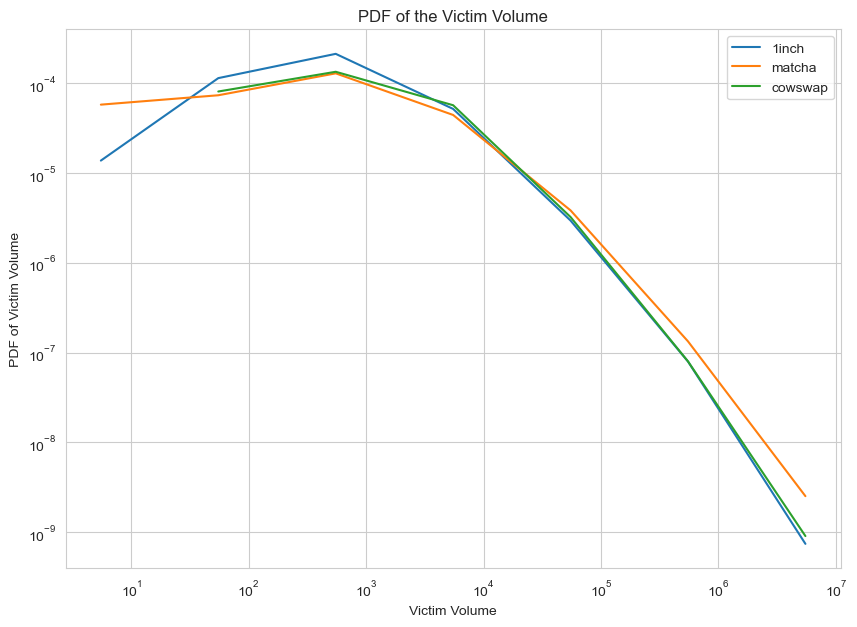

In [68]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(10,7))
volume_pdf.plot(logy=True,logx=True,ax=axes)
axes.set_xlabel('Victim Volume')
axes.set_ylabel('PDF of Victim Volume')
plt.title('PDF of the Victim Volume')